# Analysis of Mouse Brain Spatial Data

In [1]:
import stt as st
import scanpy as sc
import anndata
import scvelo as scv
import numpy as np
import pandas as pd

The processed data could be download [here](https://drive.google.com/file/d/1c53v1xo0wPd_2O7Zkfz1SWYsrv6e5bUC/view?usp=drive_link)

In [2]:
data_dir = '../data/'
adata = sc.read_h5ad(data_dir+'mouse_brain.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4628 × 117
    obs: 'n_counts', 'Region', 'Subclass', 'leiden', 'velocity_self_transition'
    var: 'GeneName', 'mean', 'std', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'highly_variable'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_xy_loc', 'velocity_xy_loc', 'xy_loc'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [4]:
sc.pp.neighbors(adata, use_rep = 'xy_loc',key_added ='spatial')

In [5]:
sc.tl.leiden(adata,resolution = 0.3)

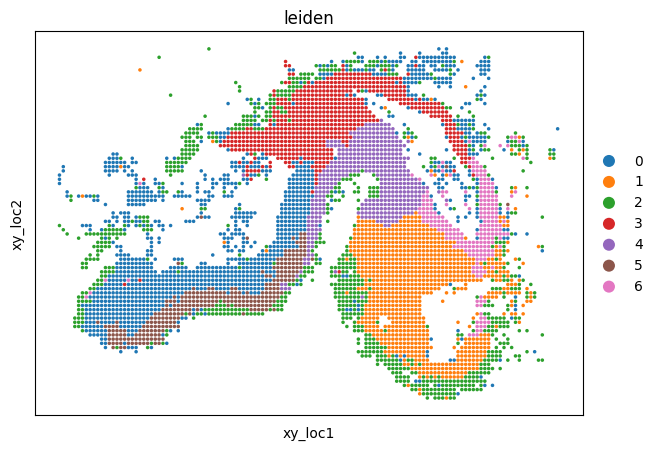

In [6]:
sc.pl.scatter(adata, basis='xy_loc', color='leiden')

In [7]:
adata.obs['leiden'].value_counts()

0    1262
1     898
2     862
3     636
4     434
5     292
6     244
Name: leiden, dtype: int64

In [8]:
U = adata.layers['unspliced']
S = adata.layers['spliced']
if 'toarray' in dir(U):
    U = U.toarray()
    S = S.toarray()
X_all = np.concatenate((U,S),axis = 1)
adata_aggr = anndata.AnnData(X=X_all)
sc.tl.pca(adata_aggr, svd_solver='arpack')
sc.pp.neighbors(adata_aggr)

In [9]:
sc.tl.leiden(adata_aggr,resolution = 0.15)
leiden = adata_aggr.obs['leiden'].values

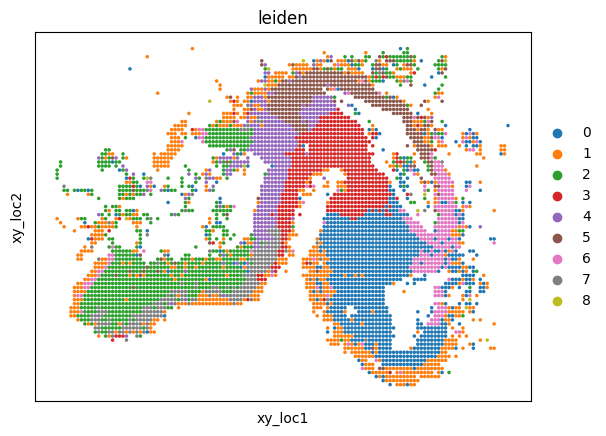

In [10]:
adata_aggr.obsm['xy_loc'] = adata.obsm['xy_loc']
sc.pl.embedding(adata_aggr, basis='xy_loc', color='leiden')

In [11]:
adata.obs['attractor'] = adata.obs['Region']
adata_aggr = st.tl.dynamical_iteration(adata,n_states = 11, n_iter = 15, weight_connectivities = 0.5,n_components = 21, n_neighbors = 50,thresh_ms_gene = 0.2, spa_weight =0.5, thresh_entropy = 0.1)


Quantiles for entropy relative difference with last iteration:
0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    1.661925
0.25    1.996808
0.50    2.101066
0.75    2.186345
1.00    2.428778
dtype: float64

Quantiles for entropy relative difference with last iteration:
0.00    0.000005
0.25    0.019871
0.50    0.037697
0.75    0.067638
1.00    0.282696
dtype: float64

Quantiles for entropy absolute difference with last iteration:
0.00    0.000010
0.25    0.042270
0.50    0.078394
0.75    0.140238
1.00    0.542062
dtype: float64
Entropy difference is below the threshold, exiting the loop.


/Users/cliffzhou/Documents/GitHub/STT/example_notebooks/stt/tl/_dynamical_analysis.py:338: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_object_aggr.obs['entropy'] = adata.obs['entropy'].values


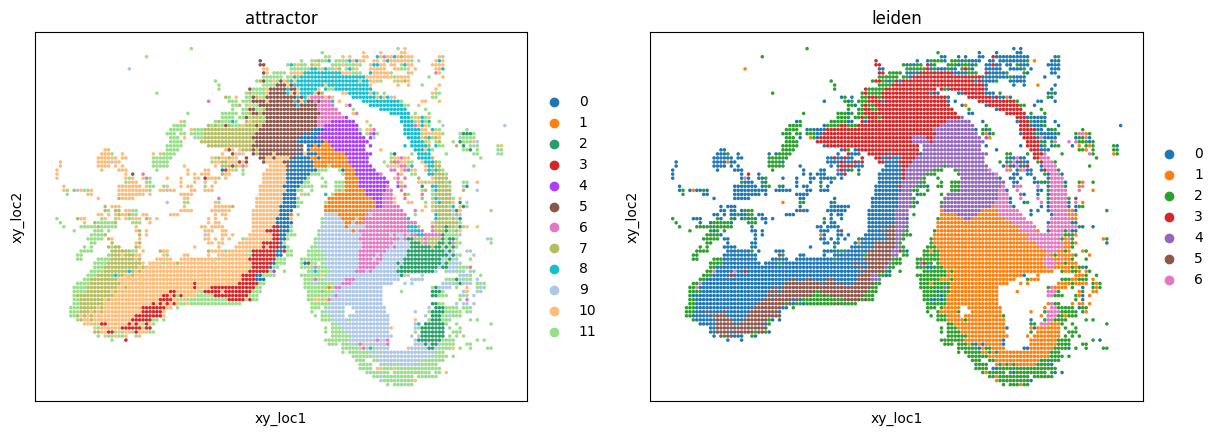

In [12]:
sc.pl.embedding(adata, basis="xy_loc", color=["attractor","leiden"])

In [21]:
adata.obs['attractor'].value_counts()

10    1062
11     935
9      627
7      381
6      269
5      267
8      258
3      176
2      174
4      173
1      162
0      144
Name: attractor, dtype: int64

In [15]:
#del adata.uns['r2_keep_train']
#del adata.uns['r2_keep_test']
#del adata.uns['kernel']
#del adata.uns['kernel_connectivities']
#del adata.uns['kernel_spatial']

adata.write_h5ad(data_dir+'mousebrain_hybiss_results.h5ad')
adata_aggr.write_h5ad(data_dir+'mousebrain_hybiss_results.h5ad')

In [17]:
st.tl.compute_pathway(adata,adata_aggr,'KEGG_2019_Mouse')

computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:19) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:15) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:17) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:18) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:16) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:14) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:12) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:14) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:12) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:12) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:12) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:14) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:14) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:12) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:16) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:18) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:11) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:14) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:13) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:16) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 8/8 cores)


  0%|          | 0/4628 [00:00<?, ?cells/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: /Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res
/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


    finished (0:00:18) --> added 
    'vj_graph', sparse matrix with cosine correlations (adata.uns)


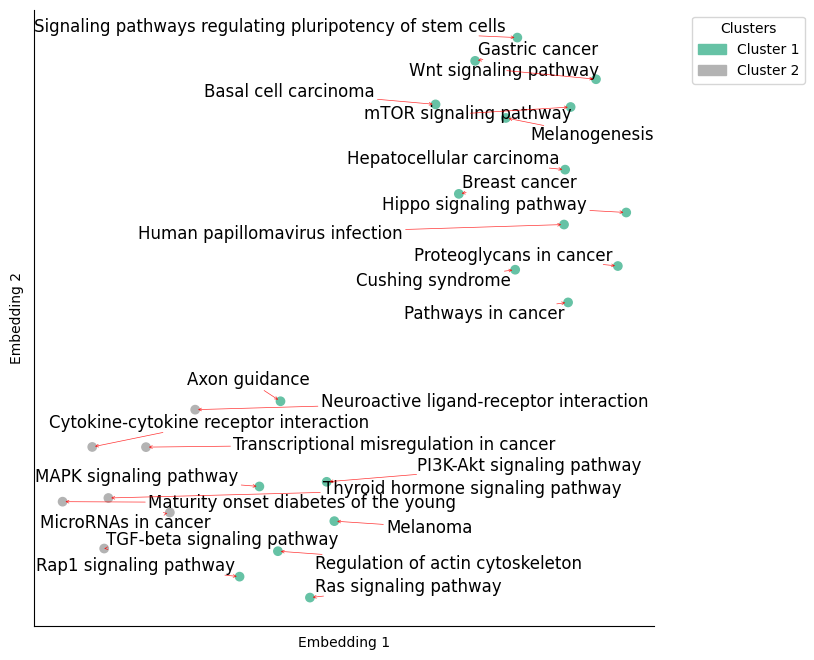

/Users/cliffzhou/anaconda3/envs/stt/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [18]:
fig = st.pl.plot_pathway(adata,figsize = (8,8))
fig.show()

In [ ]:
fig.savefig('pathway_embedding.png', bbox_inches='tight') 

In [ ]:
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
st.pl.plot_tensor_pathway(adata,adata_aggr, pathway_name = 'Wnt signaling pathway')

In [ ]:
st.pl.plot_tensor_pathway(adata,adata_aggr, 'TGF-beta signaling pathway')

In [ ]:
st.pl.plot_tensor_pathway(adata,adata_aggr,adata.uns['pathway_select'], 'Hippo signaling pathway')

## Sensitivity Analysis

In [ ]:
adata.obs['attractor'] = leiden

nrows =1
weights = [0.1,0.3,0.5,0.7,0.9]
ncols = len(weights)

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 4))

for i,sw in enumerate(weights):
#adata.obsm['X_umap'] = adata_aggr.obsm['X_umap']
    adata_aggr = st.dynamical_iteration(adata,n_states =8, n_iter = 15, return_aggr_obj=True, weight_connectivities = 0.5,n_components = 21, n_neighbors = 100,thresh_ms_gene = 0.2, use_spatial = True,spa_weight = sw, thresh_entropy = 0.05)    
    ax = axes[i]
    sc.pl.embedding(adata, basis="xy_loc", color="attractor",show = False, ax = ax)
    ax.set_title('spatial_weight='+str(sw))
plt.tight_layout()
plt.show()

                            

In [ ]:
#adata_aggr.obsm['X_umap'] = adata.obsm['X_umap']
adata_aggr = st.dynamical_iteration(adata,n_states =8, n_iter = 15, return_aggr_obj=True, weight_connectivities = 0.5,n_components = 21, n_neighbors = 100,thresh_ms_gene = 0.2, use_spatial = True,spa_weight = 0.3, thresh_entropy = 0.05, stop_cr = 'rel')    

adata_aggr.obs['Region'] = adata.obs['Region'].values
sc.pl.embedding(adata, basis="xy_loc", color="attractor")

In [ ]:
st.plot_top_genes(adata, top_genes = 100, ncols =8, wspace = 1, hspace = 1, figsize = (12,20))

In [ ]:
st.plot_genes_list(adata, genelist = ['FOXP1','FTL','TGFBI'], figsize =(8,2) ,ncols =3, wspace = 0.9, hspace = 1)
#plt.savefig('./figures/emt_genes.pdf',dpi = 800,bbox_inches = 'tight')

## Tensor Visualization

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
mpl.rcParams['axes.grid'] = False
adata.obsm['X_xy_loc'] = adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc']=adata.obsm['xy_loc']
adata_aggr.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']
adata.obsm['X_xy_loc_aggr']=adata.obsm['xy_loc']

st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [0,1,2],filter_cells = True, member_thresh = 0.1)

In [ ]:

st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [6,7],filter_cells = True, member_thresh = 0.1)

In [ ]:
sc.set_figure_params(dpi=600,fontsize = 12)
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 2,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = 1,filter_cells = True, member_thresh = 0.1)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 1,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'umap', state = 'unspliced',attractor = 2,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'joint',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'spliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
st.plot_tensor_single(adata, adata_aggr,  basis = 'xy_loc', state = 'unspliced',attractor = None,filter_cells = True, member_thresh = 0.2)

In [ ]:
sc.pl.violin(adata, keys = ['entropy'], groupby='attractor')

In [ ]:
st.construct_landscape(adata, coord_key = 'xy_loc')

In [ ]:
sc.set_figure_params(dpi=600,figsize = (6,6) ,fontsize = 10)
st.infer_lineage(adata,si=0,sf=2, method = 'MPPT',flux_fraction=0.6)

In [ ]:
%matplotlib inline
sc.set_figure_params(dpi=600,figsize = (4,4) ,fontsize = 10)
st.plot_landscape(adata, dim = 3, elev=57, azim = 167,size_point = 8)

In [ ]:
st.plot_tensor(adata, adata_aggr, basis = 'xy_loc', list_attractor = [3,4,5],filter_cells = True, member_thresh = 0.1)

## Pathway Analysis

In [ ]:
pathway = gp.parser.download_library(name = 'KEGG_2019_Mouse')

In [ ]:
tpm_dict = {}
pathway_select = {}
temp = []
for key in pathway.keys():
    gene_list = [x.capitalize() for x in pathway[key]] 
    gene_select = [x for x in gene_list if x in adata_aggr.var_names]
    if len(gene_select)>2 and gene_select not in temp:
            scv.tl.velocity_graph(adata, vkey = 'vj', xkey = 'Ms', gene_subset = gene_select ,n_jobs = -1)
            tpm_dict[key] = adata.uns['vj_graph'].toarray().reshape(-1)
            pathway_select[key] = gene_select
            temp.append(gene_select)

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a pandas DataFrame from the dictionary
arr = np.stack(list(tpm_dict.values()))
cor = np.corrcoef(arr)

In [ ]:
pca = PCA(n_components=10)
pca_embedding = pca.fit_transform(cor)

# Perform UMAP on the PCA embedding
umap_reducer = umap.UMAP()
umap_embedding = umap_reducer.fit_transform(pca_embedding)

In [ ]:
# Perform hierarchical clustering
linked = linkage(cor, method='ward')

# Define the distance threshold or desired number of clusters
# Here, we'll use a distance threshold of 1.5
threshold = 1.5

# Get clustering labels as a NumPy array
c_labels = fcluster(linked, threshold, criterion='distance')

In [ ]:

# Sample data
x = umap_embedding[:, 0]
y = umap_embedding[:, 1]
labels = tpm_dict.keys()

# Create the scatter plot
fig, ax = plt.subplots()

num_clusters = max(c_labels)
cmap = plt.cm.get_cmap('Set2', num_clusters)

# Map the labels to colors using the colormap
colors = cmap((c_labels - 1) / (num_clusters - 1))

# Plot the scatter plot with colors based on the labels
sc = plt.scatter(x, y, c=colors)

# Remove the square outline
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)


arrow_properties = dict(
    arrowstyle='->',  # Simple arrow with a head
    color='red',      # Arrow color
    linewidth=0.5,    # Arrow line width
    alpha=0.8,         # Arrow transparency     
    mutation_scale=5 
)
# Annotate points with labels
texts = []
for i, txt in enumerate(labels):
    texts.append(ax.annotate(txt, (x[i], y[i]), fontsize=8))
    
# Adjust the annotation positions to avoid overlaps
adjust_text(texts,arrowprops=arrow_properties)

# Hide axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Hide axis labels (tick labels)
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')

# Display the plot
plt.show()


In [ ]:
subset = pathway_select['TGF-beta signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.pl.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Wnt signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['MAPK signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
subset = pathway_select['Hippo signaling pathway']
adata.uns['gene_subset'] = subset
adata_aggr.uns['gene_subset'] = subset+[x+'_u' for x in subset]
st.plot_tensor_single(adata, adata_aggr, basis = 'xy_loc', state= 'joint')

In [ ]:
import importlib
importlib.reload(st)

In [ ]:
st.tl.compute_pathway(adata,adata_aggr,)